# ECON 325: Sampling Distributions
* **Authors**: COMET Team (Colin Grimes, Valeria Zolla, Rathin Dharani, Jonathan Graves)
* **Last Update**: 15 August 2022
---
## Outline

## Prerequisites
* Introduction to Jupyter
* Introduction to R
* Introduction to Visualization
* Introduction to Central Tendency
* Introduction to Distribution
* Dispersion and Dependence

## Learning Objectives

* Define a simple random sample and why it is useful in econometrics
* Use a simple random sample to infer population parameters
* Produce a sampling distribution through repeated random sampling
* Understand how sampling distributions relate to the Law of Large Numbers and the Central Limit Theorem

## Introduction to Statistical Inference

It's important to begin with the fundamental problem of statistical inference. Let's start with a **population**, which is commonly defined as the complete collection of all individuals or entities we are studying. From here, we want to determine a particular characteristic of the population, the **population parameter**. For example, if we want to determine the average height of a Canadian resident, our population would be every Canadian resident and our population parameter would be average height. Imagine how easy life would be for economists if we had access to any population parameter we desired. If we had perfect data from our population, we would be able to determine the average returns to education, the impact of stimulus checks for every resident, and so much more with absolute certainty all by surveying every member of the population. 

Unfortunately collecting data from the entire population is often too expensive and impractical. A more realistic way to find what we're looking is to survey a **sample**, a subset of individuals or entities from the population. Through this sample, we can gather a **sample estimate**, an estimate of the population parameter from our sample. From our example, it would be much more practical to survey a 1000 people in Canada and calculate their average height. Evidently, this won't exactly the match the true average height of a Canadian resident, because we haven't based our calculation off every Canadian resident, but it's probably a good estimate. But how do we know we picked a representative sample of the Canadian population?


## Simple Random Samples

A **simple random sample** is a subset of a population, in which each member of the population has an equal chance of being selected for the sample. It's important that this condition is met when selecting a sample. Imagine if we try to determine the average height of the Canadian population by only sampling professional athletes. We wouldn't get a very good estimate of our population parameter. Simple random samples allow us to create sample parameters, which are **unbiased estimators** of the population parameter. 

There are two statistical approaches:

1. We could conduct a census. To do this, we would need to measure the height of all 38 million people living in Canada. This technique produces little error, but comes at a very high cost.  Moreover, we may not actually be able to collect all of this data - what if we miss someone?

2. We could take a **simple random sample** of the Canadian population, in which all 38 million Canadians have an equal probability of being chosen. This would allow us to make **statistical inferences** on the population mean, without the cost of conducting a census. 

> **Note**: It's important to keep in mind that there are other types of sampling in economics.  Simple random sampling is just a good starting point for our discussion! In econometrics, it is crucial that we try to get as close as possible to an unbiased estimator through a random sample. Imagine if we are trying to determine the gender pay gap in British Columbia and we only take a sample from those living in downtown Vancouver or we only took a sample from those working in blue collar jobs. That wouldn't give us very accurate results. You will learn more about this in ECON 326.

## Simulating Data

It will be helpful in this notebook to work with **simulated data**. We can simulate data by drawing from some well known distributions such as normal and uniform. Before we begin simulating data to work with, we need to be familar the concept of a **random number seed**. Setting a random number seed allows us to reproduce results drawn from a distribution of a random variable.

In R and all programming languages, random numbers are not truly random, they are known as **pseudo-random numbers**. R uses a random number generator that produces a sequence of numbers that are completely determined by a seed value - they are effectively random, but also reproducible. Once you set the seed value using the `set.seed` function, everything after that point may look random, but is actually totally reproducible. For example, if you were to pick a random sample out of a 100,000 data points, every time we ran the code we would get a different random sample. You would never be able to check the work of your classmates or ever attain the same results again. By using the same seed before conducting our analyses, we are able to reproduce the results we attained earlier.  

See [this reference](https://datasciencebook.ca/classification2.html#randomseeds) for more information on how the `set.seed()` function achieves reproducible randomness in R.

In [3]:
source("sampling_tests.r") # load some background tests
library(tidyverse)
library(dplyr)
library(infer)
install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
seed_number <- 1 # my seed number

set.seed(seed_number) # set the random number seed to reproduce results

In the following, you can try changing the seed number and seeing how some of the results are different.  Remember that the default seed we used was `seed_number <- 1`.

## Example 1: Simulating a Distribution
Let's now imagine that we want to create a hypothetical population with a variable called `x` of size 10,000, distributed normally with mean 0 and standard deviation 1. Just to give an example, we can imagine `x` to represent "household indebtedness." In our example, this variable is normally distributed, meaning that most households have close to no debt, but few households have an extreme amount of debt and few others have large investments with consistent cash flow (negative debt). Below, we will create an data frame `population`, using the `rnorm` function. 

In [5]:
x <- rnorm(10000, 0, 1)  # Draw 10,000 observations from the random normal distribution with mean 0, and variance 1.

population <- data.frame(x) #store it in a data frame

Let's ensure that our function has worked as expected. We should have a population mean of 0, and standard deviation of 1. Additionally, we will visualize our distribution using a histogram, otherwise known as a **population distribution**. In this example, our population distribution should be normally distributed, centered around 0. We will visually depict the mean as a blue line on the histogram. 

In [6]:
table <- population %>% 
        summarize(mean = mean(x), sd = sd(x)) %>%
        round(digits = 2) #two decimal places

table 

mean,sd
<dbl>,<dbl>
-0.01,1.01


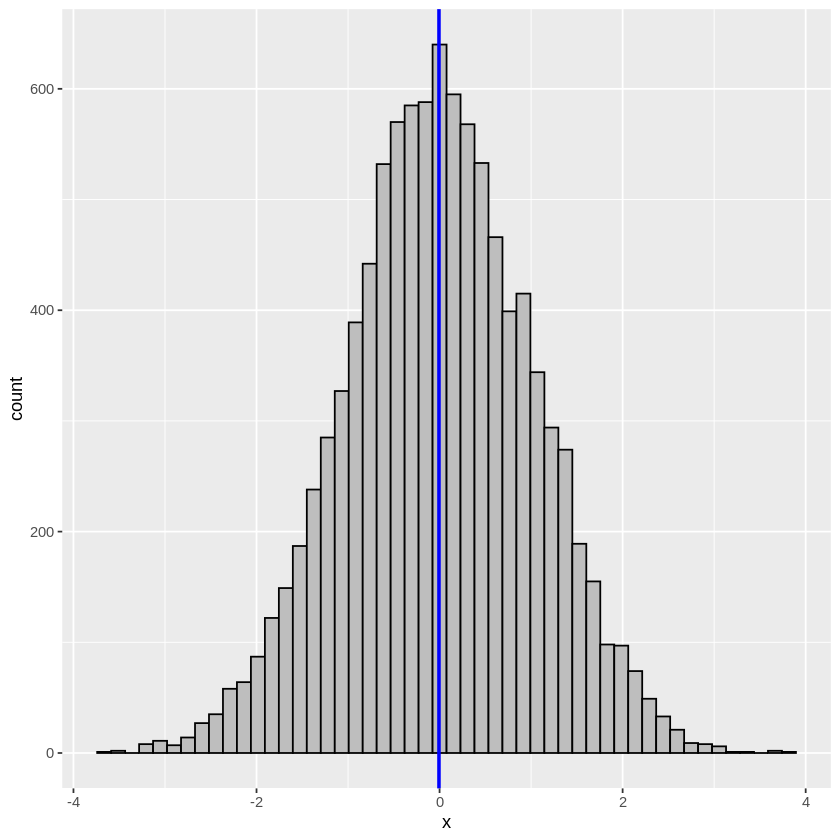

In [7]:
pop_dist <- population %>%
            ggplot(aes(x = x)) +  
            geom_histogram(bins = 50, color = "black", fill = "gray") +  
            geom_vline(xintercept = mean(population$x), colour="blue", linetype = "solid", lwd = 1)
pop_dist

Now suppose we would like to estimate the population mean above, however, we do not have the time nor money to conduct a census of the population. Additionally, we **are** able to randomly sample everyone in the population with equal probability.

To take a simple random sample in R, we can use the `slice_sample` function. Let's start with a very small sample of size 5, and see how it compares to our population mean.  We will select the observations from the data set by their number.

In [8]:
sample_data <- population %>% 
               slice_sample(n = 5) # 5 observations in our sample
               
s_table <- sample_data %>% 
        summarize(mean = mean(x), sd = sd(x)) %>%
        round(digits = 2) # two decimal places 

s_table 

mean,sd
<dbl>,<dbl>
-0.24,1.5


Notice the sample average is very different from our true population average. Because we have taken such a small sample, we have introduced bias into the estimation of our population parameter - this error is commonly referred to as **small sample bias**. To produce a more unbiased estimate of the population mean, we must take a larger sample.

We will now take another simple random sample with a larger sample of size 30.

In [9]:
sample_data <- population %>% 
               slice_sample(n = 30,  # 30 observations in our sample
               replace = TRUE) # with replacement

s_table <- sample_data %>% 
        summarize(mean = mean(x), sd = sd(x)) %>%
        round(digits = 2) # two decimal places

s_table

mean,sd
<dbl>,<dbl>
-0.04,1.03


Just by increasing our sample from n = 5, to n = 30, our estimate has gotten much closer to the population mean. We will soon see with even greater confidence that having a larger sample size gets us closer and closer to the true mean of the population. 

In this exercise, we have accomplished the following:

1. Simulated a standard normally distributed population of size 10,000.
2. Estimated the population mean, using the sample mean as an unbiased estimator.

Next we will create a distribution of sample means through repeated random samples from our population.

### Exercise 1: Simple random samples

In this exercise:

1. Create an object `a` which is a draw from the unifom distribution, with 5,000 observations between 10 and 20, using the random seed 20.
2. Take a simple random sample of size 30 from our population, and calculate the sample mean and store it in an object `answer_1`

In [10]:
set.seed(...)

a <- runif(... , ... , ...) # variable you are creating
eg_data_frame <- data.frame(a)

answer_1 <- eg_data_frame %>%
            slice_sample(n = ...) %>%
            summarize(mean = mean(...)) %>%
            pull() %>%
            round(3)

answer_1 

test_1()

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


## Repeated Random Samples and Sampling Distributions

Remember that when we survey a sample, we are only observing a subset of the population and determining a sample estimate based off that sample. If we surveyed a different 1000 Canadian residents every time, we would certainly get a different estimate for the average height of a Canadian resident. Let's assume for now that we can draw many samples of size $n$ from our normal distribution population. Every time we draw a new sample, we will get a different estimate of the mean. Now, if we were to plot each of those estimates onto a histogram, we would get a **sampling distribution**. A sampling distribution of a statistic is a probability distribution based on repeated independent samples of size $n$ from a population of size $N$. Using the example introduced above, we can produce a distribution of sample means, based on repeated and independent simple random samples from our population. If we take enough samples, we will find that the mean of the sampling distribution will be nearly equal the mean of our population distribution (our population parameter). Amazing, isn't it? With an infinite number of random samples, the mean of the sampling distribution will be exactly equal to the population parameter. 

We are more interested in the effect of increasing sample size. We will find that with larger and larger samples sizes, the standard error of the sampling distribution decreases. In other words, in a given sample of a larger sized $n$, the probability of having a sample estimate far away from the true population parameter decreases. This is a very important concept in statistical inference and econometrics.   

### Scenario 1: Population is normally distributed

We will need to take $R$ independent simple random samples of size $n$ from our `population` of size $N$, to produce our sampling distribution ($R$ observations). To do this in R, we will need to take a simple random sample of size $n$, compute the sample mean, and store it in a vector. We will then repeat this $R$ times, appending each sample mean into our vector. Our vector, in this case, will represent the observations of our sampling distribution!

We can define the **standard error** as the standard deviation of the sampling distribution. The standard error will inform us on how much our sample mean will vary from sample to sample. For this exercise, we will keep the number of samples constant and progressively increase our sample size to see how it affects the standard error of the sampling distribution. 

We will use the `rep_sample_n` function from the `infer` package in R. This function allows us to repeatedly take samples from a population. The `size` parameter indicates the sample size and the `reps` parameter indicates the number of samples we wish to draw from our population. The solid blue line represents the true mean of the normal distribution population (0) and the dashed red line shows us the mean of the sampling distribution. Given that we are taking many samples, these two values should be very similar.

#### 1. Suppose we take 1000 simple random samples ($R = 1000$), with a sample size of 5 ($n = 5$):

sd_mean,se
<dbl>,<dbl>
0.02119237,0.4549141


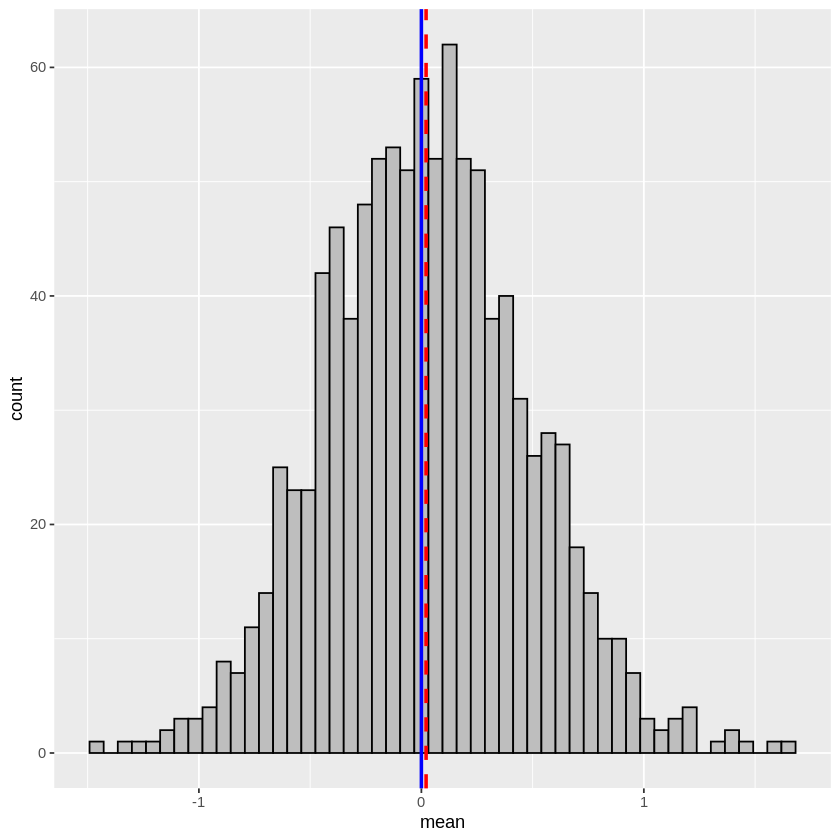

In [14]:
# CREATES A DATA FRAME WITH ALL 1000 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
reps_5_1000 <- population %>%
        rep_sample_n(size = 5, reps = 1000) %>%  # creates 5 samples of size 5
        group_by(replicate) %>%                  # groups each of the samples 
        summarize(mean = mean(x), sd = sd(x))    # calculates the mean of each sample

#CALCULATES THE MEAN AND STANDARD ERROR OF THE SAMPLING DISTRIBUTION
sample_5_mean_se <- reps_5_1000 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_5_mean_se

#VISUAL DEPICTION OF SAMPLING DISTRIBUTION
sampling_dist_5_1000 <- reps_5_1000 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = 0, colour="blue", linetype = "solid", lwd = 1) + 
                     geom_vline(xintercept = mean(reps_5_1000$mean), colour="red", linetype = "dashed", lwd = 1)                  

sampling_dist_5_1000

#### 2. Suppose we take 1,000 simple random samples ($R = 1000$), with a sample size of 50 ($n = 50$):

sd_mean,se
<dbl>,<dbl>
-0.002376021,0.1455034


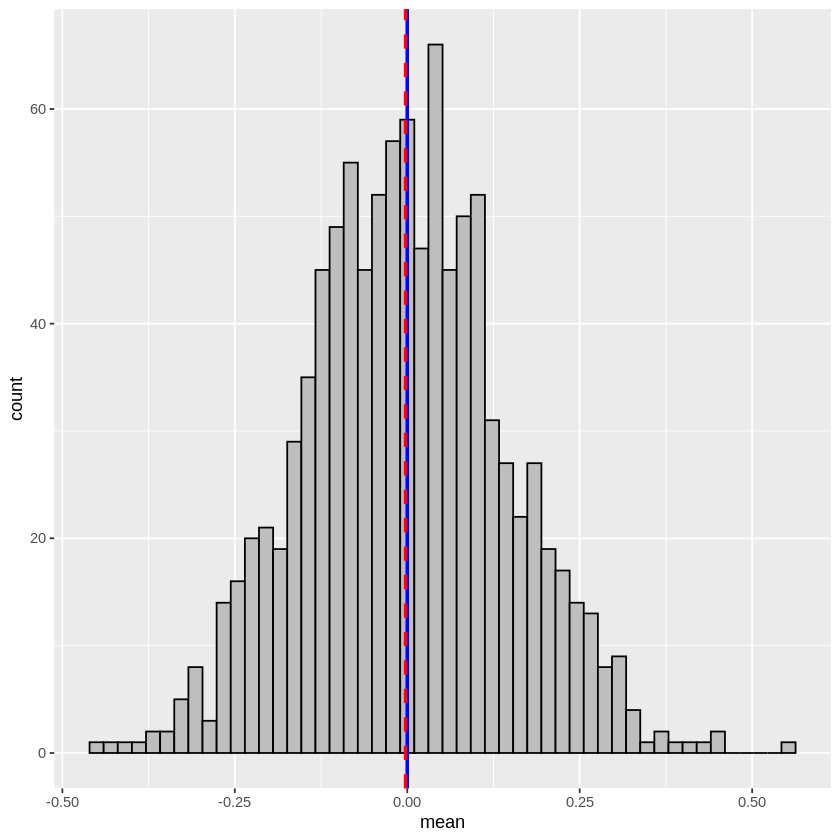

In [15]:
# CREATES A DATA FRAME WITH ALL 1000 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
reps_50_1000 <- population %>%
        rep_sample_n(size = 50, reps = 1000) %>%  # creates 1000 samples of size 5
        group_by(replicate) %>%                   # groups each of the samples 
        summarize(mean = mean(x), sd = sd(x))     # calculates the mean of each sample

# CALCULATES THE MEAN AND STANDARD ERROR OF THE SAMPLING DISTRIBUTION
sample_50_mean_se <- reps_50_1000 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_50_mean_se

# VISUAL DEPICTION OF SAMPLING DISTRIBUTION
sampling_dist_50_1000 <- reps_50_1000 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = 0, colour="blue", linetype = "solid", lwd = 1) + 
                     geom_vline(xintercept = mean(reps_50_1000$mean), colour="red", linetype = "dashed", lwd = 1)                  

sampling_dist_50_1000

> **Pro tip:** See how the scale of the x axis for $n = 50$ has adjusted from $n = 5$ in response to the reduction in error? 

Now that we have increased the number of repeated and independent simple random samples from 5 to 1000, notice that the mean of our sampling distribution is much closer to our population mean. Let's further increase our sample size to see how we can reduce the standard error of our estimate.

#### 3. Suppose we take 1,000 simple random samples ($R = 1000$), with a sample size of 500 ($n = 500$):

sd_mean,se
<dbl>,<dbl>
-0.007458989,0.04352231


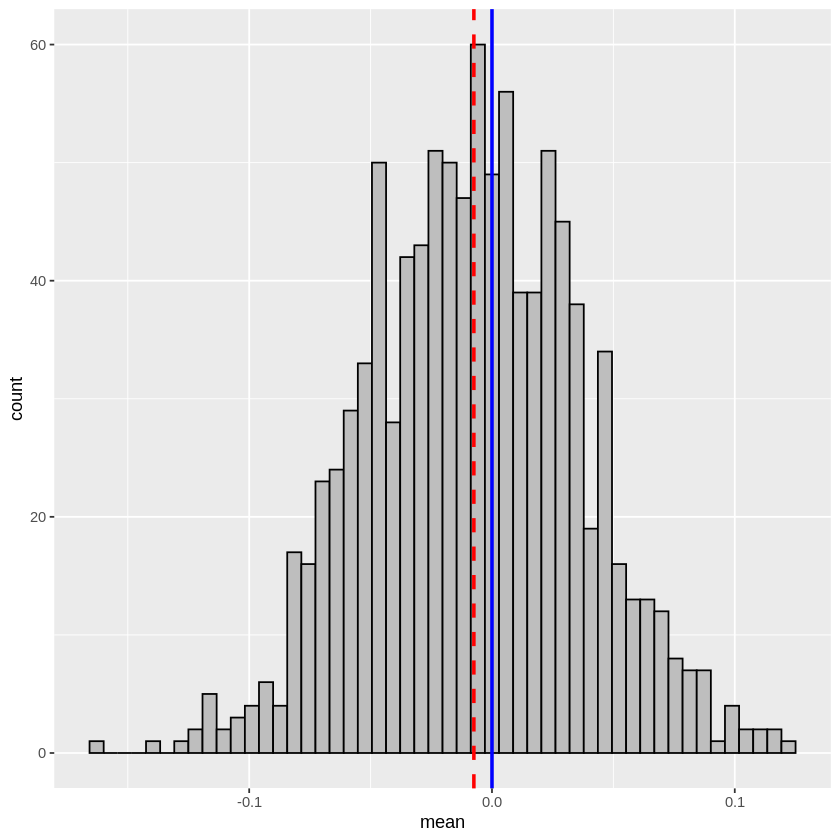

In [22]:
# CREATES A DATA FRAME WITH ALL 1000 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
reps_500_1000 <- population %>%
        rep_sample_n(size = 500, reps = 1000, replace = FALSE) %>%  #creates 1000 samples of size 5
        group_by(replicate) %>%                                     #groups each of the samples 
        summarize(mean = mean(x))                                   #calculates the mean of each sample

# CALCULATES THE MEAN AND STANDARD ERROR OF THE SAMPLING DISTRIBUTION
sample_500_mean_se <- reps_500_1000 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_500_mean_se

# VISUAL DEPICTION OF SAMPLING DISTRIBUTION
sampling_dist_500_1000 <- reps_500_1000 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = 0, colour="blue", linetype = "solid", lwd = 1) +
                     geom_vline(xintercept = mean(reps_500_1000$mean), colour="red", linetype = "dashed", lwd = 1)                  

sampling_dist_500_1000

### Exercise 2: Taking Random Samples

Let's try it for ourselves. Take a sample of size 50 with 1000 reps from the same `population` data frame and produce a data frame with only the means. Assign your answer to the object `answer_2`.

In [ ]:
# FILL IN THE BLANKS
set.seed(30)

answer_2 <- population %>%
        rep_sample_n(... = ..., ... = ...) %>%
        group_by(...) %>%
        summarize(mean = ...(x))

test_2()

Because the number of samples we drew from our population is constant, we saw that the mean of our sampling distribution was roughly equivalent to the true population mean for all of our examples. However, we varied our sample sizes. It's important to notice that as we increased our samples size, the standard error decreased. As a reminder, having a low standard error means that the probability of having a sample produce a sample estimate that is far away from the true population parameter is very low. In the previous examples with a sample size of 500, we can see that the sample means are mostly between -0.1 and +0.1. With a sample size of 5, the sample means are mostly between -1 and 1. 

Having a low standard error is something we economists seek to have in our experiments. Because it's often only possible to collect _one_ sample in real life, we tend to collect as large a sample as possible to minimize the standard error. This gives us high confidence that our sample estimate will be close to the true population parameter. 

You may have wondered how economists calculate the standard error of a sample estimate using only one sample. We will get to that in the section about Bootstrapping later in this lesson. 

### Scenario 2: Population is not normally distributed

Another important concept in statistics is that as the number of samples drawn from the population increases, the mean of the sampling distribution converges to the true value of the population parameter. Furthermore, by increasing the number of samples, the sampling distribution become a closer resemblance of a normal distribution curve. This is true regardless of the shape of the original population distribution - again here, it is just the _sampling distribution_ that starts to look more like a normal curve, and not the _population distribution_. 

This exercise will be nearly identical to above, with the difference being our population will now be random uniformly distributed. Similar to the previous example, increasing the the sample size will reduce the standard error of the sampling distribution. For this exercise, we will see how varying the samples taken affects the sampling distribution. We can achieve this in R using the `runif()` function to create a uniform distribution.

true_mean
<dbl>
0.5002802


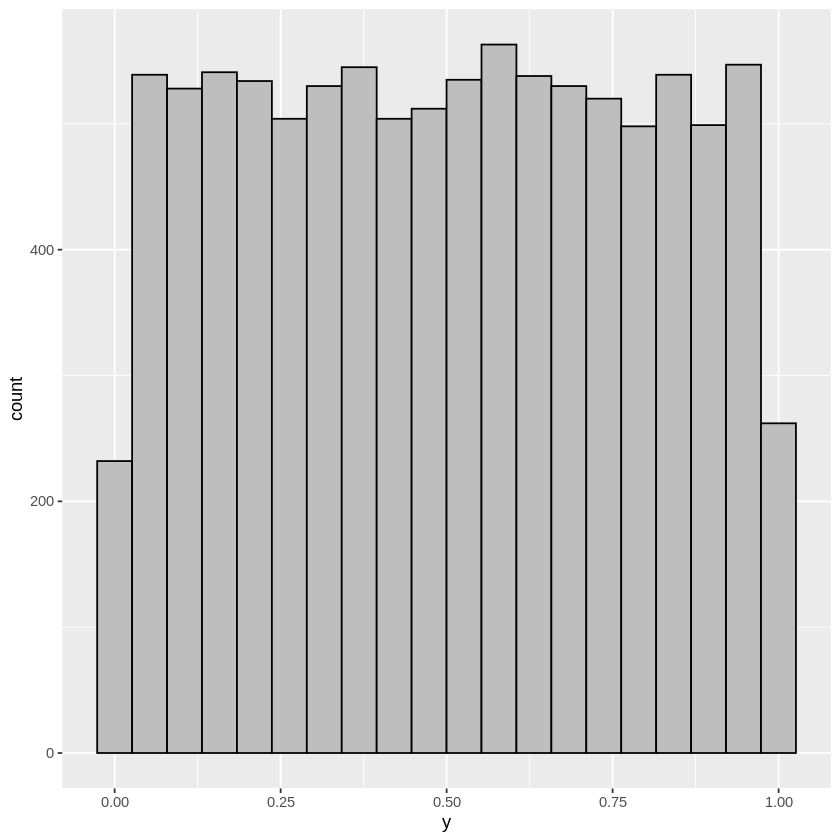

In [23]:
y <- runif(10000, 0, 1)  # Draw 10,000 observations from the random uniform distribution between 0 and 1

population_unif <- data.frame(y)

unif_pop_dist <- population_unif %>%
                 ggplot(aes(x = y)) + 
                 geom_histogram(bins = 20, color = "black", fill = "gray")

unif_pop_dist

unif_pop_mean_se <- population_unif %>%
        summarize(true_mean = mean(y))

unif_pop_mean_se

#### 1. Suppose we take 100 simple random samples (`reps` = 100), with a sample size of 100 (`size` = 100):

sd_mean,se
<dbl>,<dbl>
0.4967452,0.03007583


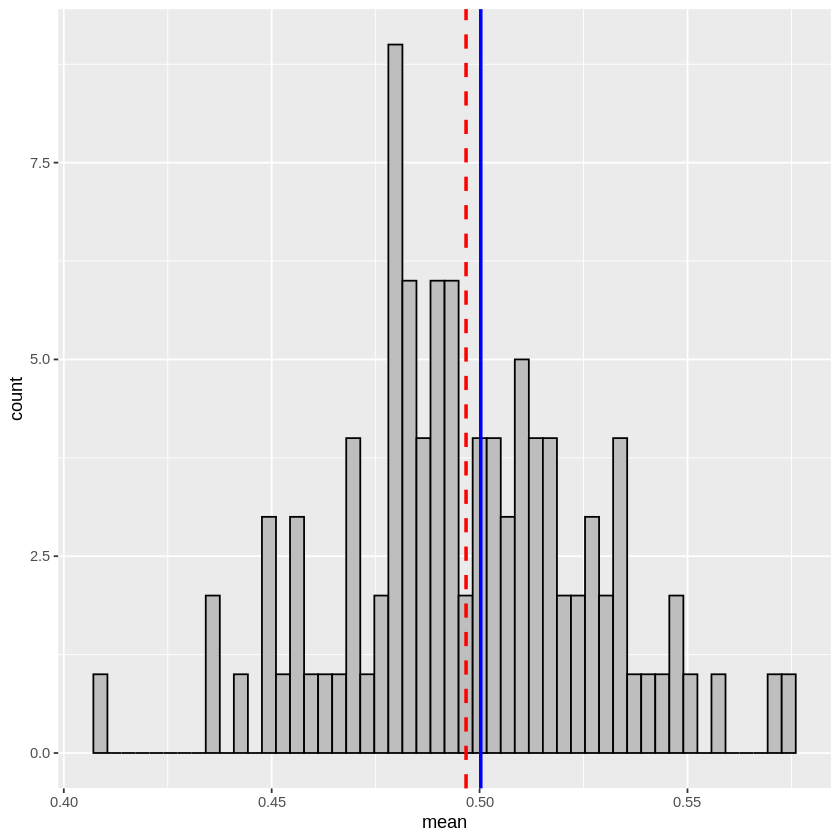

In [24]:
# CREATES A DATA FRAME WITH ALL 100 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
unif_reps_100_100 <- population_unif %>%
        rep_sample_n(size = 100, reps = 100) %>%               #creates 5 samples of size 5
        group_by(replicate) %>%                                #groups each of the samples 
        summarize(mean = mean(y))                              #calculates the mean of each sample

# MEAN AND STANDARD ERROR OF SAMPLING DIST
sample_100_mean_se <- unif_reps_100_100 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_100_mean_se

# VISUAL DEPICTION OF SAMPLING DISTRIBUTION
unif_sampling_dist_100_100 <- unif_reps_100_100 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = mean(population_unif$y), colour="blue", linetype = "solid", lwd = 1) + 
                     geom_vline(xintercept = mean(unif_reps_100_100$mean), colour="red", linetype = "dashed", lwd = 1)  

unif_sampling_dist_100_100


#### 2. Suppose we take 1,000 simple random samples ($R = 1000$), with a sample size of 5 ($n = 5$):

sd_mean,se
<dbl>,<dbl>
0.5008443,0.02998547


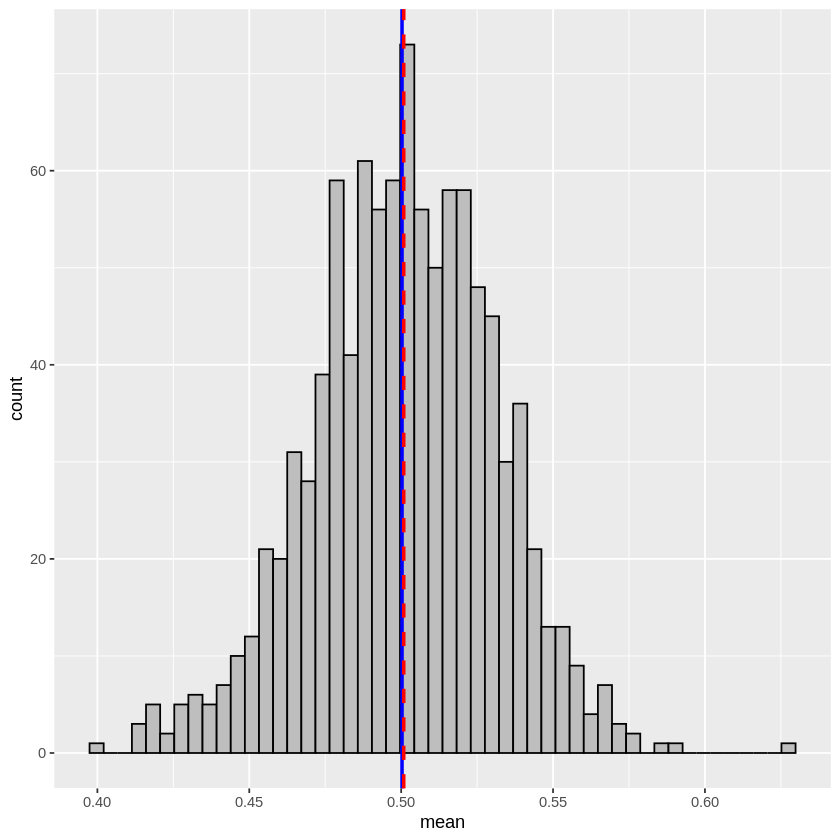

In [25]:
# CREATES A DATA FRAME WITH ALL 100 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
unif_reps_100_1000 <- population_unif %>%
        rep_sample_n(size = 100, reps = 1000) %>%   # creates 5 samples of size 5
        group_by(replicate) %>%                     # groups each of the samples 
        summarize(mean = mean(y))                   # calculates the mean of each sample

# MEAN AND STANDARD ERROR OF SAMPLING DIST
sample_1000_mean_se <- unif_reps_100_1000 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_1000_mean_se

# VISUAL DEPICTION OF SAMPLING DISTRIBUTION
unif_sampling_dist_100_1000 <- unif_reps_100_1000 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = mean(population_unif$y), colour="blue", linetype = "solid", lwd = 1) + 
                     geom_vline(xintercept = mean(unif_reps_100_1000$mean), colour="red", linetype = "dashed", lwd = 1)  

unif_sampling_dist_100_1000


#### 3. Suppose we take 20,000 simple random samples (`reps` = 20,000), with a sample size of 500 (`size` = 500$):

sd_mean,se
<dbl>,<dbl>
0.5004801,0.02854337


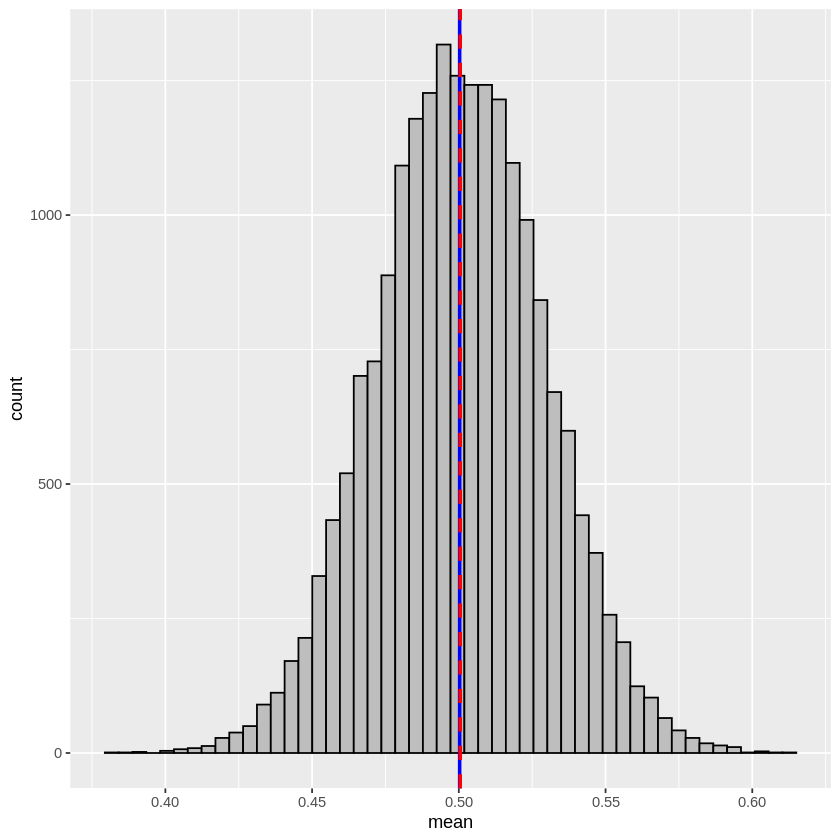

In [26]:
# CREATES A DATA FRAME WITH ALL 100 RANDOM SAMPLES, AND CALCULATES MEAN AND STANDARD DEVIATION OF EACH SAMPLE 
unif_reps_100_20000 <- population_unif %>%
        rep_sample_n(size = 100, reps = 20000) %>%               #creates 5 samples of size 5
        group_by(replicate) %>%                                #groups each of the samples 
        summarize(mean = mean(y))                              #calculates the mean of each sample

# MEAN AND STANDARD ERROR OF SAMPLING DIST
sample_20000_mean_se <- unif_reps_100_20000 %>%
        summarize(sd_mean = mean(mean), se = sd(mean))

sample_20000_mean_se

#VISUAL DEPICTION OF SAMPLING DISTRIBUTION
unif_sampling_dist_100_20000 <- unif_reps_100_20000 %>%
                     ggplot(aes(x = mean)) +
                     geom_histogram(bins = 50, color = "black", fill = "gray") + 
                     geom_vline(xintercept = mean(population_unif$y), colour="blue", linetype = "solid", lwd = 1) + 
                     geom_vline(xintercept = mean(unif_reps_100_20000$mean), colour="red", linetype = "dashed", lwd = 1)  

unif_sampling_dist_100_20000


Notice how the difference between the mean of the sampling distribution and the true value of the population parameter become closer and closer as we increase the number of samples drawn. As mentioned above, we can also see that the sampling distribution curve more strongly resembles a normal distribution curve as we increase the number of samples drawn - pretty neat! This is true regardless of the fact that we began with a population that was uniformly distributed.

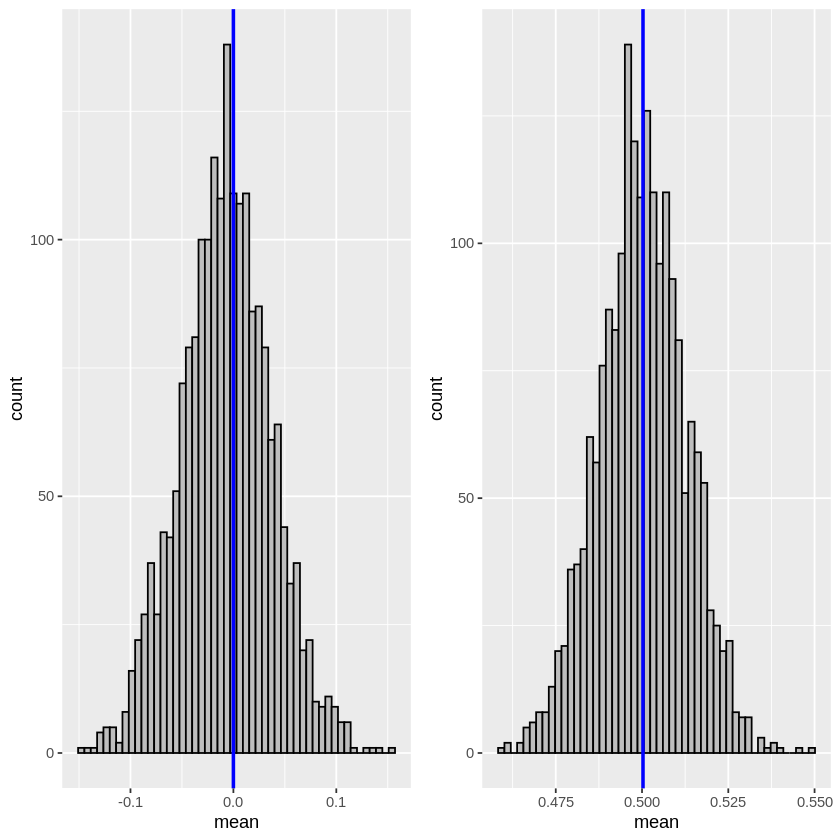

In [31]:
SIZE <- 500
REPS <- 2000

pop_dist_eg <- population %>%
        rep_sample_n(size = SIZE, reps = REPS) %>%  # CHANGE PARAMETERS HERE
        group_by(replicate) %>%                                  
        summarize(mean = mean(x)) %>%
        ggplot(aes(x = mean)) +
        geom_histogram(bins = 50, color = "black", fill = "gray") + 
        geom_vline(xintercept = 0, colour="blue", linetype = "solid", lwd = 1) 

unif_dist_eg <- population_unif %>%
        rep_sample_n(size = SIZE, reps = REPS) %>%  # CHANGE PARAMETERS HERE
        group_by(replicate) %>%                                  
        summarize(mean = mean(y)) %>%
        ggplot(aes(x = mean)) +
        geom_histogram(bins = 50, color = "black", fill = "gray") + 
        geom_vline(xintercept = mean(population_unif$y), colour="blue", linetype = "solid", lwd = 1) 

grid.arrange(pop_dist_eg, unif_dist_eg, ncol = 2)

In the above graph, we fixed the sample size and number of samples for both the normal distribution and uniform distribution examples, and we attained two sampling distributions that are strikingly similar to a normal distribution curve. You have just witnessed something magical in statistics ✨! Regardless of the initial population distribution, as we increase our sample size and the number of simple and independent simple random samples, our sampling distribution converges to our population mean! Try it out yourself by increasing `SIZE` and `REPS` to see how higher values make the distribution become tighter around the true population mean.

This converging of the sample mean to a normal distribution is referred to as the **Central Limit Theorem** in statistics.

### Exercise 3: Taking Samples and Visualizing the Sampling Distribution

Use the `population_unif` data frame and draw 500 samples of sample size 50. Then create a visualization of the sampling distribution. Finally, calculate the standard error of this sampling distribution and assign it to the object `answer_3`. Remember the `sd` function calculates the standard deviation of a column. Template code has been provided.

In [32]:
set.seed(40) # don't change this

eg_3 <- ... %>%
        ...(... = ..., ... = ...) %>%
        ...(...) %>%
        summarize(mean = mean(y)) 

eg_3_graph <- eg_3 %>%
        ggplot(...(x = mean)) + 
        geom_histogram(bins = 50, color = "black", fill = "gray") + 
        geom_vline(xintercept = mean(population_unif$y), colour="blue", linetype = "solid", lwd = 1) 

answer_3 <- eg_3 %>%
            summarize(se = ...(mean)) %>%
            pull() %>%
            round(5)

test_3()

ERROR: Error in ...(., ...): could not find function "..."


### Exercise 4: Understanding Standard Error

What does the standard error tell us?

**A**: the average variation in the population distribution  
**B**: the average variation in our sample estimates of the population parameter  
**C**: the probability that our sample estimate is correct  
**D**: exactly what the sample estimate tells us  

Answer in capital letters surrounded by quotation marks. eg... `"E"`



In [33]:
answer_4 <- "..."

test_4(answer_4)

[1] "This is correct. The sampling distribution shows the frequency of the various sample estimates that we calculated from each of our samples that we drew. The standard error shows the average variation in these. In practice, the standard error is used to indicate how likely it is that our sample estimate lies close to our population parameter. Obviously, we want to aim for low standard errors so that this likelihood increases."

## Quick Review ##

We just learned a lot of new terms which all sound very similar, so let's take a moment to review. 
The **population** is the collection of all individuals or entities we are interested in studying. From the above example, the population is entire population of Canada. From the population, we are interested in knowing a particular quantity, the **population parameter**. From our example, this is the height. 

A **simple sample** is a small subset of the population which we use to get an estimate of the parameter we are interested. This is the **sample estimate** for the population parameter. Because we are often unable to conduct a comprehensive census in the real world, we have to use the sample estimate as an estimate for the population parameter. 

In a hypothetical world, we assume that we are able to take many samples of size `n` from the same population and attain a sample estimate from all of those samples. When we plot those sample estimates on a histogram, we get a **sampling distribution**. When we take many samples, we find that the mean of the sampling distribution (the most frequently observed estimate of the population parameter) is very close to the actual value of the population parameter. 

We have also noticed that as we increase sample size, our standard error decreases. When we increase the number of samples drawn from the population, the mean of the sampling distribution progresses closer and closer to the population parameter and our sampling distribution has a closer resemblance to a normal distribution curve.

## Central Limit Theorem (CLT) and the Law of Large Numbers (LLN)

The **Central Limit Theorem** tells us that no matter the distribution of the population, with sufficient sample size (usually above 30 and no more than 5% of the population), the distribution of sample means will tend toward normal.

> Note: When sampling more than 5% of a population, we should use the Finite Population Correct Factor (FPC). This is because the Central Limit Thereom does not hold, and the standard error will be too large: FPC = $((N-n)/(N-1))^{1/2}$

The **Law of Large Numbers** tells us that with a sufficiently large number of repeated and independent random samples, the mean of our distribution of sample means will tend toward the population mean! Notice the visualization of our sample mean as we increase $R$ in the example below!

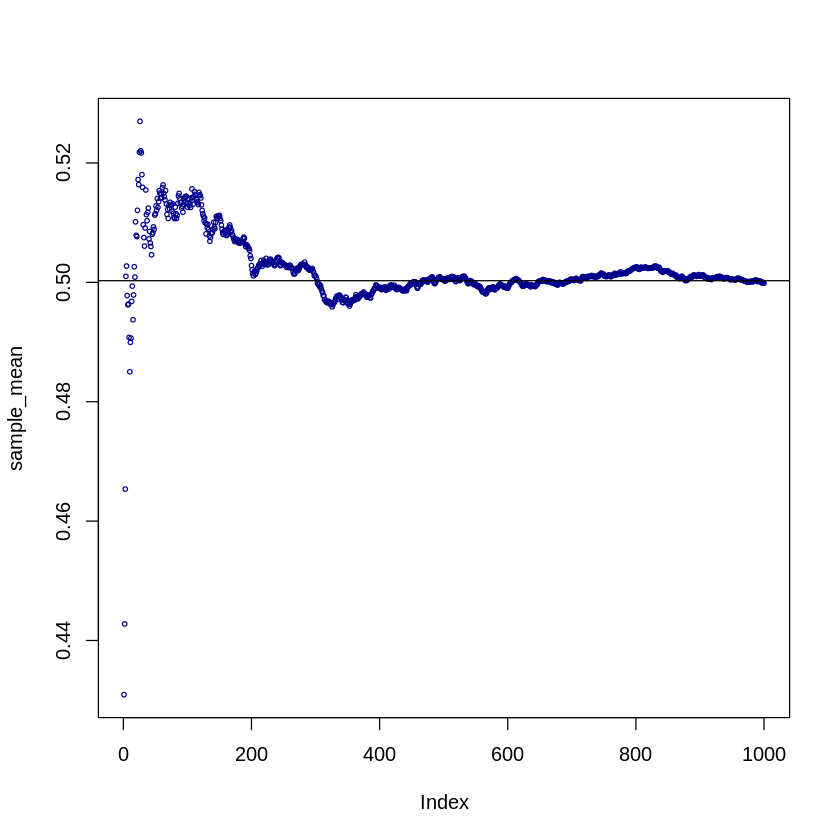

In [34]:
set.seed(55)

# RUN THIS CODE. 

r = 1000 # Number of iterations (number of sample means produced for our distribution)
num = 10 # Sample size
R = 1:r # Range of iterations
means <- vector(,r) # Create empty vector to store sample means
sample_mean <- vector(,r)

for (val in R) { # loop over all values in R 
    means[val] = mean(slice_sample(population_unif, n = num)$y) # Take a sample of size n from the population, caluclate the mean, and store in vector means, with index of the current iteration
    sample_mean[val] <- mean(means[1:val]) # Running value of sample mean at index equal to current iteration
}

options(scipen = 10)
plot(sample_mean, cex=0.5, col="darkblue")
abline(h = mean(population_unif$y))

See how many many iterations (in this case, 1000) eventually produce a relatively stable line around 0.5 for this example?

### INTERACTIVE EXERCISE DEMONSTRATING CLT

In this exercise, we will create a new simulation for you to play around with $R$ and $n$ to get a better understanding of how sampling distribution changes with sample size and the number of repeated independent random samples. You can alter the values by changing the `SIZE` and `REPS` constants at the top of the code block. Try different values and see for yourself how the shape of the sampling distribution changes. 

Note: You can also try different distributions of our population, try the following: `rchisq(n, df)`, `rexp(n, rate)`, `rf(n, df1, df2)`

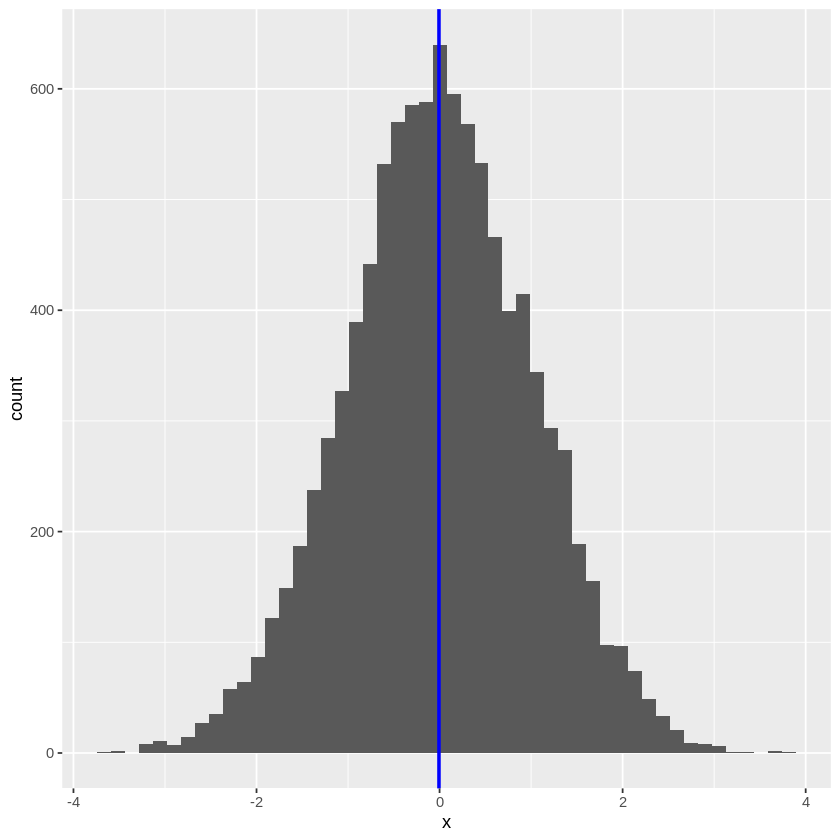

In [35]:
population_ex <- rexp(10000, 0.2)  # Draw 10,000 observations from the random uniform distribution between 0 and 1
population_ex <- data.frame(x)
pop_dist_int <- population_ex %>% 
                ggplot(aes(x = x)) +
                geom_histogram(bins = 50) +
                geom_vline(xintercept = mean(population_ex$x), colour="blue", linetype = "solid", lwd = 1) 
pop_dist_int

sd_mean,se
<dbl>,<dbl>
-0.006266774,0.1429355


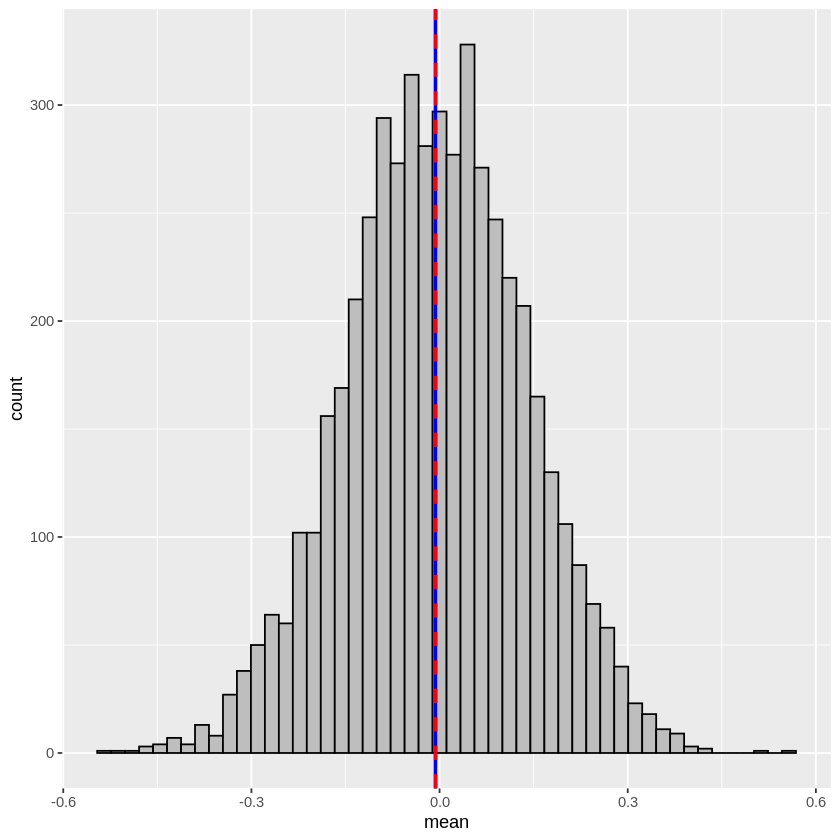

In [36]:
SIZE = 50 # change me here
REPS = 5000 # change me here

population_sample_estimates <- population_ex %>%
                 rep_sample_n(size = SIZE, reps = REPS) %>%
                 group_by(replicate) %>%
                 summarize(mean = mean(x))

pop_mean_se <- population_sample_estimates %>%
               summarize(sd_mean = mean(mean), se = sd(mean))

pop_mean_se 

samp_dist_int <- population_sample_estimates %>%
                 ggplot(aes(x = mean)) +
                 geom_histogram(bins = 50, color = "black", fill = "gray") + 
                 geom_vline(xintercept = mean(population_ex$x), colour="blue", linetype = "solid", lwd = 1) +
                 geom_vline(xintercept = mean(population_sample_estimates$mean), colour="red", linetype = "dashed", lwd = 1)

samp_dist_int

                 

## Bootstrapping 

From the previous examples, it was quite a process to calculate the standard error. We had to first have access to the population and draw hundreds of samples from that population to make a sampling distribution. This is impossible for multiple reasons (1) we almost never access to the entire population (2) drawing two samples of 10 individuals is the same as drawing one sample of 20. Naturally, you may have been wondering how economists calculate the standard error of their sample estimates. One common technique is **bootstrapping** samples.

In the bootstrapping process, we start off by taking one sample of size $n$ from our population. We then take a sample of size $n$ from our sample, with replacement. Let's imagine we have a paper bag with 5 red balls and 5 green balls, which we will treat as our sample. In order to draw a bootstrap sample, we pick 1 ball out of the bag ten times while allowing replacement. We take out the first ball, note whether it's a red or green ball, then put it back in the bag and repeat the process 9 more times to arrive at our bootstrap sample. Note that with this method, it is entirely possible to draw any combination of red and green balls. The bootstrap sampling method introduces sampling variability to our sample. 

If we repeat this process by drawing many bootstrap samples, we can arrive at a bootstrap distribution which serves as an approximation of our sampling distribution. 

### Example

Let's demonstrate this using our normal distribution data frame `population`. We first start off by taking a sample from our population. Once again we use the `slice_sample` function to achieve this. To connect it back to the average height example, imagine that we had resources to sample 100 people about their height out of the entire Canadian population. 

In [37]:
boot_main_sample <- population %>%
        slice_sample(n = 100)

head(boot_main_sample)
paste("This is the mean of our sample: ", mean(boot_main_sample$x))

,x
,<dbl>
1,-2.6917672
2,0.9741919
3,-0.7944772
4,0.4715366
5,1.6453477
6,0.1196474


[1] "This is the mean of our sample:  0.0653523030717318"

Now, we want to know the uncertainty behind this estimate. Thinking back to our sampling distribution, how would we know if our sample estimate of 0.008 is close to the true population parameter. It's entirely possible we got a sample estimate far off from our true population parameter - for example, we could have gotten a value in the tails of the sampling distribution. To begin to understand the uncertainty around our sample estimate, we must compute the standard error. 

Let's draw bootstrap samples from our sample. The code is largely similar from before, except the key difference that we now add `replace = TRUE` to our `rep_sample_n` function. This tells R to allow replacement when taking samples. 

In [38]:
boot_samples <- boot_main_sample %>%
        rep_sample_n(size = 500, reps = 1000, replace = TRUE)

head(boot_samples)

replicate,x
<int>,<dbl>
1,0.7369598
1,2.1653685
1,-0.5806143
1,-1.3294752
1,-0.4184661
1,-0.1760471


Now that we have our bootstrap samples, let's calculate the bootstrap sample means and make a bootstrap sampling distribution. We use the same methods as we used above. 

sd_mean,se
<dbl>,<dbl>
0.06650021,0.04508779


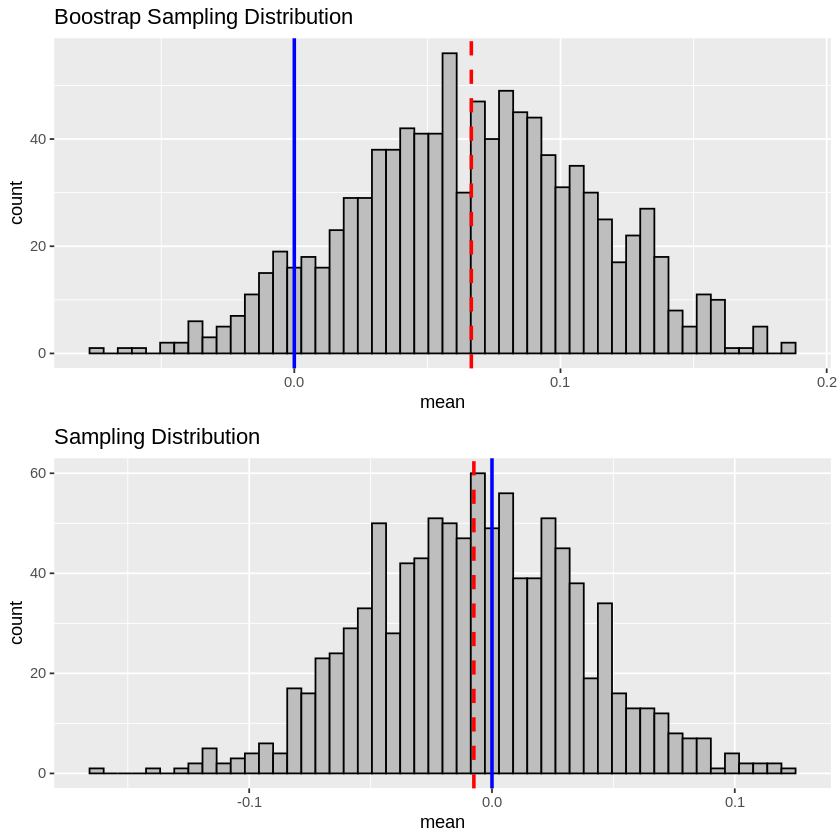

In [40]:
boot_means <- boot_samples %>%
        group_by(replicate) %>%
        summarize(mean = mean(x))

boot_mean_se <- boot_means %>%
        summarize(sd_mean = mean(mean), se = sd(mean)) 

boot_mean_se

boot_sampling_dist <- boot_means %>%
                      ggplot(aes(x = mean)) +
                      geom_histogram(bins = 50, color = "black", fill = "gray") + 
                      geom_vline(xintercept = 0, colour="blue", linetype = "solid", lwd = 1) + 
                      geom_vline(xintercept = mean(boot_means$mean), colour="red", linetype = "dashed", lwd = 1) +
                      ggtitle("Boostrap Sampling Distribution")

grid.arrange(boot_sampling_dist, sampling_dist_500_1000 + ggtitle("Sampling Distribution"))

There are many things to unpack here. Notice from the graphs that our bootstrap sampling distribution visually serves as a good approximation of our sampling distribution. We can also see that the standard error for the bootstrap sampling distribution (0.00402) is very close to our sampling distribution standard error, which was (0.0433). 

The key difference in the graphs is the mean of the distributions. The mean of the sampling distribution is nearly equivalent to the population parameter. However, the mean of the bootstrap distribution will be the value of the sample estimate from the first sample we took from the population. This is the reason why the bootstrap distribution sits to the right of the sampling distribution. 

The key takeaway here is that the standard error of the bootstrap sampling distribution serves as a great approximation of the standard error of the sampling distribution. 

This gives us a solid foundation to learn about confidence intervals and hypothesis testing in the coming weeks. 

### Exercise 5: Taking Bootstrap Samples

For this exercise, we have taken a sample from the `population` data frame and assigned it to the object `boot_eg_sample` of sample size 50. You are going to make a data frame of bootstrap sample estimates with 1000 reps. Afterwards, you will assign the standard error of the bootstrap sampling distribution to `answer_5`. We have provided a code template below. 

In [ ]:
set.seed(60)

boot_eg_sample <- ... %>%
        slice_sample(n = ...)

boot_eg_sample_est <- boot_eg_sample %>%
        ...(... = ..., ... = ..., replace = ...) %>%
        ...(...) %>%
        summarize(mean = ...(x))

answer_5 <- boot_eg_sample_est %>%
        summarize(se = ...(mean)) %>%
        pull() %>%
        round(3)

test_5()